##### Fluid Dynamics-Inspired Emotional Analysis & Sentiment Flow for Argumentation Mining (AM)


The idea is to use "Fluid Dynamics-Inspired Emotional Analysis" to calculate sentiment flow of micortext to improve solving of sub-task of AM

- Stance Detection 
- Argumentative Discourse Unit Classfication
- Argumetative Relation Classfication

In [1]:
import shutil
import pandas as pd
from SentimentFlow import SpeechProcessor
from SentimentFlow import SentimentFlowCalculator
pd.set_option("display.max_colwidth", None)
import numpy as np

/Users/Panos/Library/Caches/pypoetry/virtualenvs/sf-mWc6rdew-py3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


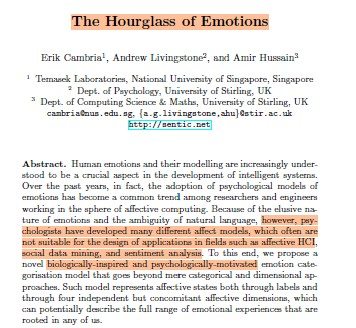   


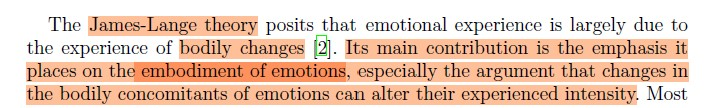

![alt text](Glass_of_Emotion4.jpg)

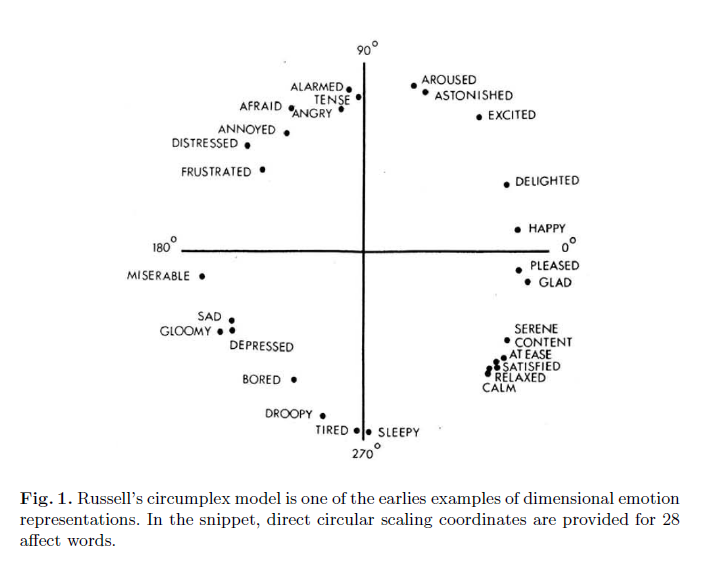

In [23]:
#input_text_path = './data/senticnet/senticnet.txt'       #In case, that we want to use other senticnet
#output_tsv_path = './data/senticnet/senticnet.tsv'
#shutil.copyfile(input_text_path, output_tsv_path)
#print("TSV file saved as:", output_tsv_path)

In [4]:
pwd

'h:\\moha\\NLP\\AM\\SA\\ArguSentiment\\src'

In [3]:
processor = SpeechProcessor('../data/senticnet.tsv')


In [4]:
processor.categories

['INTROSPECTION', 'TEMPER', 'ATTITUDE', 'SENSITIVITY']

In [5]:
senticnet = processor.senticnet_data

In [6]:
senticnet.shape

(300000, 14)

In [7]:
senticnet[30000:30020]

,CONCEPT,INTROSPECTION,TEMPER,ATTITUDE,SENSITIVITY,PRIMARY EMOTION,SECONDAY EMOTION,POLARITY VALUE,POLARITY INTENSITY,SEMANTICS,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
30000,broomsticks,0.877,0.000,0.807,0.0,#ecstasy,#delight,positive,0.842,wand,nest_table,cork,rod,beam
30001,broth,0.241,0.145,0.000,0.0,#contentment,#serenity,positive,0.193,liquid_food,eat_food,hot_liquid,heart,meat_vegetable
30002,brothe,0.241,0.145,0.000,0.0,#contentment,#serenity,positive,0.193,liquid_food,eat_food,hot_liquid,heart,meat_vegetable
30003,brothel,-0.957,0.000,-0.785,0.0,#grief,#loathing,negative,-0.871,bonk,hump,jazz,screw,fornicate
30004,brothel_keeper,0.860,0.000,0.763,0.0,#ecstasy,#delight,positive,0.811,crime,crook,malefactor,felon,outlaw
30005,brothel_owner,-0.867,0.000,-0.774,0.0,#grief,#loathing,negative,-0.821,jazz,fornicate,bonk,hump,screw
30006,brotheler,-0.957,0.000,-0.785,0.0,#grief,#loathing,negative,-0.871,bonk,hump,jazz,screw,fornicate
30007,brothellike,-0.957,0.000,-0.785,0.0,#grief,#loathing,negative,-0.871,bonk,hump,jazz,screw,fornicate
30008,brothelry,-0.957,0.000,-0.785,0.0,#grief,#loathing,negative,-0.871,bonk,hump,jazz,screw,fornicate
30009,brothels,-0.957,0.000,-0.785,0.0,#grief,#loathing,negative,-0.871,bonk,hump,jazz,screw,fornicate


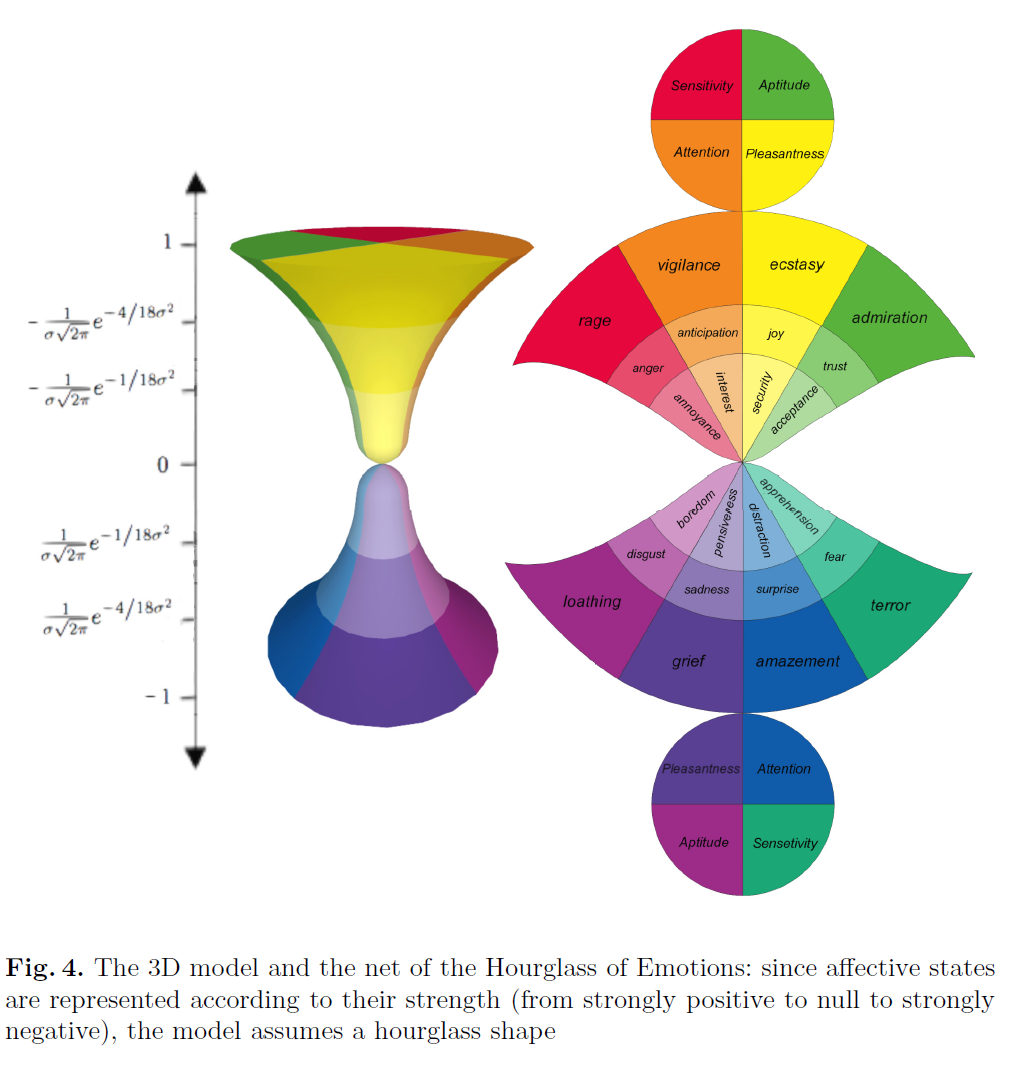

In [8]:
senticnet[110000:110005]

,CONCEPT,INTROSPECTION,TEMPER,ATTITUDE,SENSITIVITY,PRIMARY EMOTION,SECONDAY EMOTION,POLARITY VALUE,POLARITY INTENSITY,SEMANTICS,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
110000,heresiographies,0.965,0.0,0.757,0.0,#ecstasy,#delight,positive,0.861,epistle,gospel,canonic,apocryphal,apocrypha
110001,heresiography,0.965,0.0,0.757,0.0,#ecstasy,#delight,positive,0.861,epistle,gospel,canonic,apocryphal,apocrypha
110002,heresiologer,0.965,0.0,0.757,0.0,#ecstasy,#delight,positive,0.861,epistle,gospel,canonic,apocryphal,apocrypha
110003,heresiologies,0.965,0.0,0.757,0.0,#ecstasy,#delight,positive,0.861,epistle,gospel,canonic,apocryphal,apocrypha
110004,heresiologist,0.965,0.0,0.757,0.0,#ecstasy,#delight,positive,0.861,epistle,gospel,canonic,apocryphal,apocrypha


![FluidDynamic.jpg](attachment:FluidDynamic.jpg)

In [9]:
df = pd.read_json("../data/dfMT-PC_SA.json") 

In [10]:
df   #0 is for Permie and  1 is for Claim 

,EDU,Relations,Label
0,"[Yes, it's annoying and cumbersome to separate your rubbish properly all the time., Three different bin bags stink away in the kitchen and have to be sorted into different wheelie bins., But still Germany produces way too much rubbish, and too many resources are lost when what actually should be separated and recycled is burnt., We Berliners should take the chance and become pioneers in waste separation!]","[[1, 5, Attack], [2, 1, Support], [3, 1, Attack], [4, 3, Support]]","[0, 0, 0, 0, 1]"
1,"[One can hardly move in Friedrichshain or Neukölln these days without permanently scanning the ground for dog dirt., And when bad luck does strike and you step into one of the many 'land mines' you have to painstakingly scrape the remains off your soles., Higher fines are therefore the right measure against negligent, lazy or simply thoughtless dog owners., Of course, first they'd actually need to be caught in the act by public order officers,, but once they have to dig into their pockets, their laziness will sure vanish!]","[[1, 3, Support], [2, 3, Support], [4, 3, Attack], [5, 4, Attack]]","[0, 0, 1, 0, 0]"
2,"[Health insurance companies should not cover treatment in complementary medicine, unless the promised effect and its medical benefit have been concretely proven., Yet this very proof is lacking in most cases., Patients do often report relief of their complaints after such treatments., But as long as it is unclear as to how this works, the funds should rather be spent on therapies where one knows with certainty.]","[[2, 1, Attack], [3, 2, Attack], [4, 1, Attack], [5, 4, Attack]]","[1, 0, 0, 0, 0]"
3,"[Of course there are a number of programmes in public broadcasting that are not worth the licencing fee,, and others, such as “Musikantenstadl” and soap operas, are only interesting to certain audiences., Nevertheless, everybody should contribute to the funding of the public broadcasters in equal measure,, for we need general and independent media., After all we want to get our view of the world neither through the lens of the government nor through that of rich media entrepreneurs.]","[[1, 3, Attack], [2, 3, Attack], [4, 3, Support], [5, 4, Support]]","[0, 0, 1, 0, 0]"
4,"[Intelligence services must urgently be regulated more tightly by parliament;, this should be clear to everyone after the disclosures of Edward Snowden., Granted, those concern primarily the British and American intelligence services,, but the German services evidently do collaborate with them closely., Their tools, data and expertise have been used to keep us under surveillance for a long time.]","[[2, 1, Support], [3, 2, Attack], [4, 3, Attack], [5, 4, Support]]","[1, 0, 0, 0, 0]"
...,...,...,...
107,"[Dog owners should pay higher fines for dog dirt left on pavements,, although there aren't enough bins and bag-dispensers for dog dirt., One reason for this is that they have thus far hardly had to fear the consequences despite the obligation to clean up., A higher fine, so dog owners would have to dig deeper into their pockets, is supposed to be a deterrent after all., The city, especially the green spaces, should be kept tidy after all,, for they are there for our recreation., Besides you're not allowed to leave other rubbish without punishment.]","[[2, 1, Attack], [3, 1, Support], [4, 1, Support], [5, 1, Support], [6, 5, Support], [7, 1, Support]]","[1, 0, 0, 0, 0, 0, 0]"
108,"[Capital punishment is not a solution,, as it cannot be ruled out that the judicial process may make mistakes., Criminals should not be put in luxury prisons, though., After all there are criminals who enjoy 'living' in prison for its decent board, no taxes to be paid, no stress with work., Still, the state needs the death penalty as a deterrent to horrific crimes.]","[[1, 5, Attack], [2, 1, Support], [3, 5, Support], [4, 3, Support]]","[0, 0, 0, 0, 1]"
109,"[The TV license fee should only be collected from those who actually make use of the programming of the public

In [11]:
sr = df["EDU"]
sr

0                                                                                                                                                        [Yes, it's annoying and cumbersome to separate your rubbish properly all the time., Three different bin bags stink away in the kitchen and have to be sorted into different wheelie bins., But still Germany produces way too much rubbish, and too many resources are lost when what actually should be separated and recycled is burnt., We Berliners should take the chance and become pioneers in waste separation!]
1                                [One can hardly move in Friedrichshain or Neukölln these days without permanently scanning the ground for dog dirt., And when bad luck does strike and you step into one of the many 'land mines' you have to painstakingly scrape the remains off your soles., Higher fines are therefore the right measure against negligent, lazy or simply thoughtless dog owners., Of course, first they'd actually need to be c

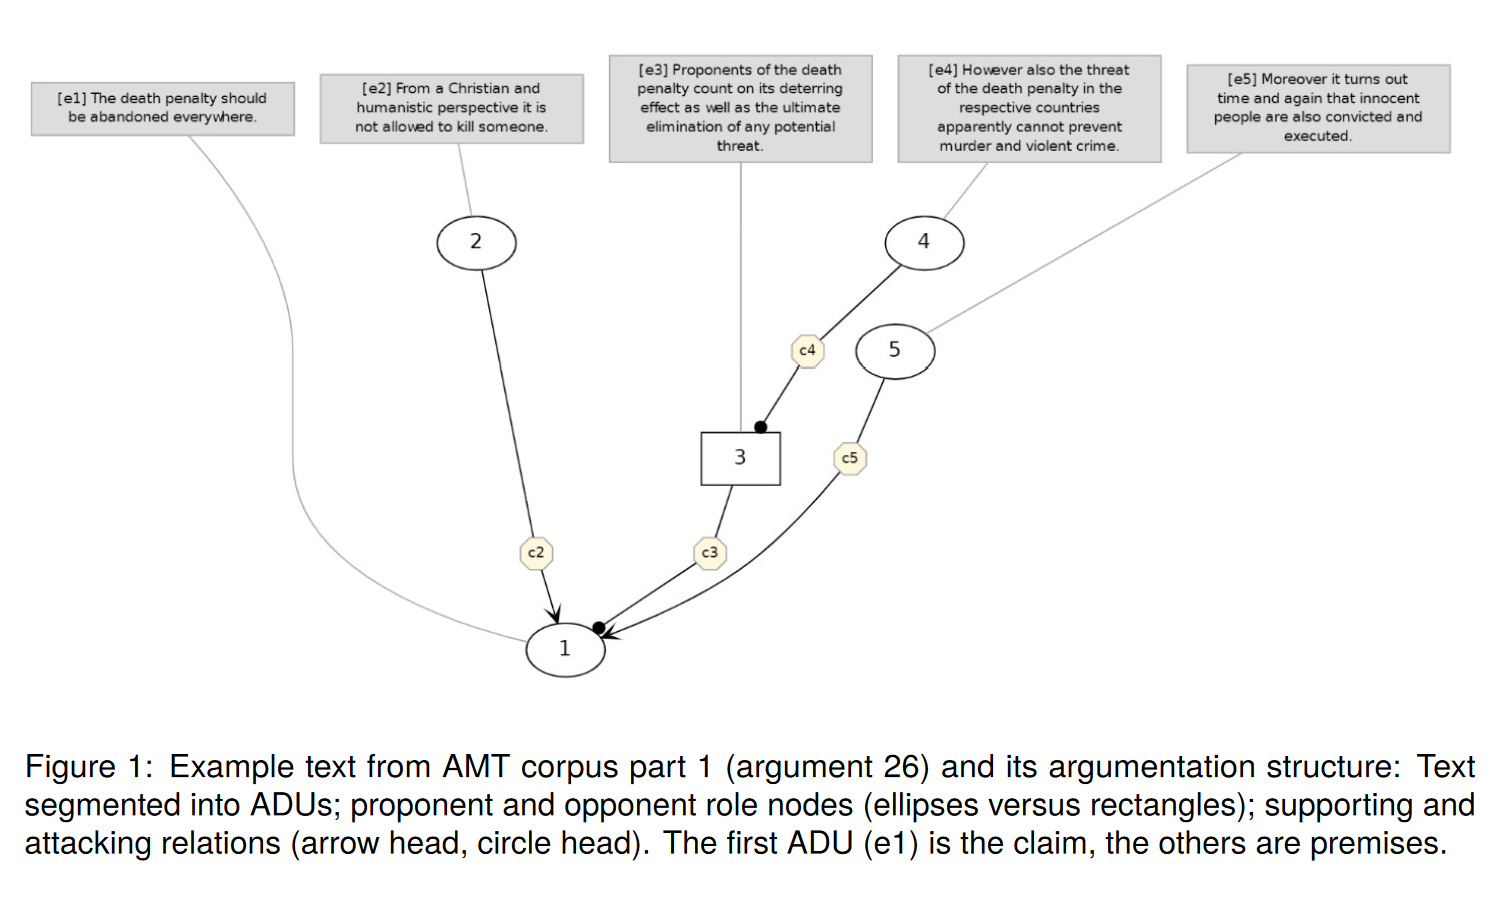

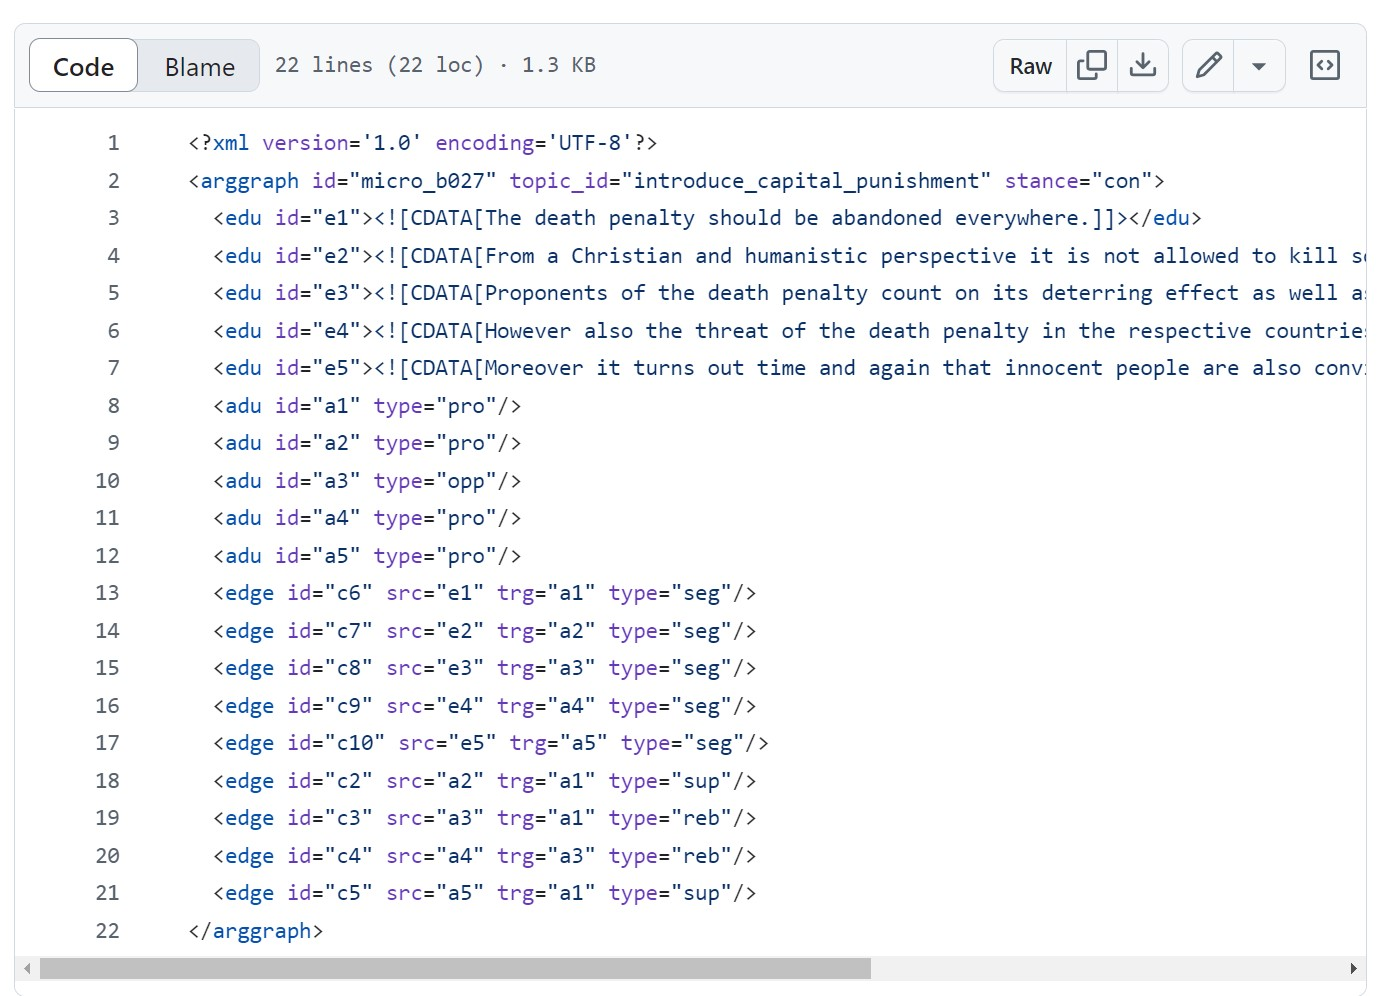

Following Walton (2009), a counter-argument can
be defined as an attack on a specific argument
by arguing against either its claim (called rebuttal), the validity of reasoning of its premises toward its claim (undercut), or the validity of one of
its premises (undermining)

In [12]:
sr[28]

['The TV/radio licence fee can only be required of all citizens/households equally.',
 "Critics point out that they are not using what's on offer by public broadcasting.",
 'I do doubt that there is anyone who has never at least indirectly watched the programming of the public broadcasters.',
 'However, it is impossible to monitor this and collect more customized fees.',
 'Just as with other choices in culture or infrastructure, public broadcasters are also to be financed, regardless of whether individuals make use of their programming or not.']

In [13]:
processed_texts = processor.process_texts(sr[26])
processed_texts


20-Sep-24 12:07:03 - Starting to process
Processing texts:   0%|          | 0/5 [00:00<?, ?it/s]


KeyError: 'SECONDARY EMOTION'

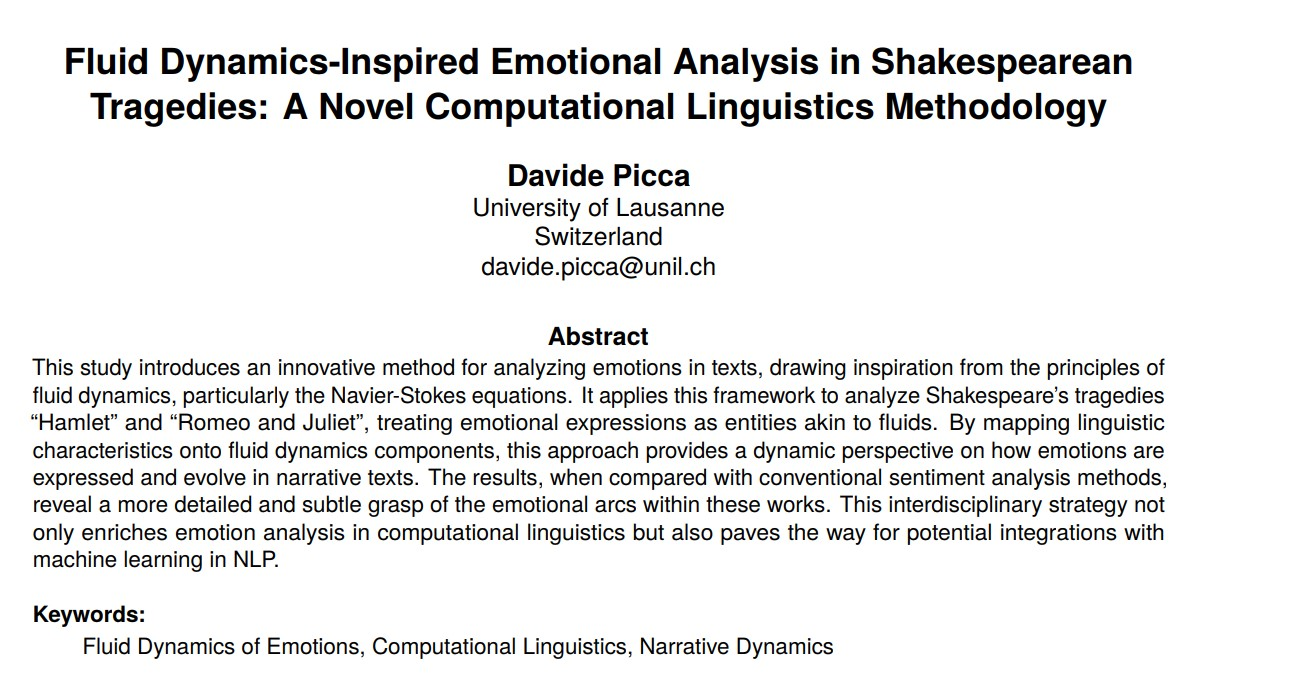

In [ ]:
#Average of two elements based  (ADU + Score,)  ->Visual + stance detection
#M-Arg 
#https://github.com/rafamestre/m-arg_multimodal-argumentation-dataset/tree/main

In [18]:
#https://www.simscale.com/docs/simwiki/numerics-background/what-are-the-navier-stokes-equations/
# predict global sentiment based on sentiment flow
flow_calculator = SentimentFlowCalculator()
results = flow_calculator.calculate_navier_stocker_for_texts(processed_texts)
pd.DataFrame(results)

06-Sep-24 13:08:54 - Starting to calculate Navier-Stocker...
Calculating Navier-Stocker for texts:   0%|          | 0/5 [00:00<?, ?it/s]h:\moha\NLP\AM\SA\.venv\lib\site-packages\SentimentFlow\sentiment_analysis.py:250: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  s = odeint(self._differential_equation, s0, t, args=(speech_info,))
Calculating Navier-Stocker for texts: 100%|██████████| 5/5 [00:00<00:00,  6.78it/s]
06-Sep-24 13:08:55 - Finished calculating texts.
06-Sep-24 13:08:55 - Processed 5 texts.
06-Sep-24 13:08:55 - Saving results to results/navier_stocker_text_results.json


,0,1,2,3,4
0,"{'text': ('Yes, it's annoying and cumbersome to separate your rubbish properly all the time.', 'Yes, it's annoying and cumbersome to separate your rubbish properly all the time.'), 'simulation': [[-0.596, 0.856, 0.0, -0.078, -0.275, 0.0, 0.0, 0.0, -0.33, 0.552], [-1635758.589679426, 1143465.6799531488, -0.2858317660334531, 6.48547460749791, -0.30916456220263566, -0.09983979698171364, -0.10455366860460323, 0.03887816990297336, -0.3778711120620492, 1.1822548663986767]], 'emotion dimension': ['ATTITUDE', 'INTROSPECTION#ecstasy', 'INTROSPECTION#loathing', 'POLARITY', 'SENSITIVITY', 'SENSITIVITY#eagerness', 'SENSITIVITY#enthusiasm', 'SENSITIVITY#loathing', 'TEMPER', 'TEMPER#calmness']}","{'text': ('Three different bin bags stink away in the kitchen and have to be sorted into different wheelie bins.', 'Three different bin bags stink away in the kitchen and have to be sorted into different wheelie bins.'), 'simulation': [[-0.393, 0.961, -0.828, -0.09283333333333336, 0.0, 0.0, 0.948, 0.0, 0.0, 0.0], [-1181878.6355286664, -605686.8831267324, -49572.493544324694, -2.691459734833532, -0.09659390278224089, -0.114037870799912, 0.6619237225872394, -0.07818113382284547, -0.004639202694886343, -0.11014078403859276]], 'emotion dimension': ['ATTITUDE', 'INTROSPECTION#ecstasy', 'INTROSPECTION#loathing', 'POLARITY', 'SENSITIVITY', 'SENSITIVITY#eagerness', 'SENSITIVITY#enthusiasm', 'SENSITIVITY#loathing', 'TEMPER', 'TEMPER#calmness']}","{'text': ('But still Germany produces way too much rubbish', 'But still Germany produces way too much rubbish'), 'simulation': [[-0.596, 0.825, 0.0, 0.10550000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [-1734723.0604102025, 1272404.76793983, -0.22013787346931069, 6.785629724943612, 0.08925610036013823, 0.1051356276243539, 0.095911131405498, 0.09645787517311442, 0.09615234271911263, 0.09617460083959732]], 'emotion dimension': ['ATTITUDE', 'INTROSPECTION#ecstasy', 'INTROSPECTION#loathing', 'POLARITY', 'SENSITIVITY', 'SENSITIVITY#eagerness', 'SENSITIVITY#enthusiasm', 'SENSITIVITY#loathing', 'TEMPER', 'TEMPER#calmness']}","{'text': ('and too many resources are lost when what actually should be separated and recycled is burnt.', 'and too many resources are lost when what actually should be separated and recycled is burnt.'), 'simulation': [[0.0, 0.0, -0.899, -0.2312, 0.0, 0.497, 0.918, -0.856, 0.0, 0.0], [-0.48547521815545785, -0.253380864517073, -0.8580954019290294, -0.47014394507053314, -0.28569441867129874, 0.15715657918447615, 0.23070152691879758, -0.6579730644262812, -0.20119363134125134, -0.3945420101860727]], 'emotion dimension': ['ATTITUDE', 'INTROSPECTION#ecstasy', 'INTROSPECTION#loathing', 'POLARITY', 'SENSITIVITY', 'SENSITIVITY#eagerness', 'SENSITIVITY#enthusiasm', 'SENSITIVITY#loathing', 'TEMPER', 'TEMPER#calmness']}","{'text': ('We Berliners should take the chance and become pioneers in waste separation!', 'We Berliners should take the chance and become pioneers in waste separation!'), 'simulation': [[-0.521, 0.9195, 0.0, 0.0935, 0.0, 0.0, 0.0, -0.856, 0.0, 0.0], [-1753336.154643537, 1282152.7119937069, -0.2947044007316606, 9.096348893254362, 0.07491357338596526, 0.027514155251133533, 0.07332940852358343, -0.6296044008746554, 0.08129000088554555, -0.07976068987016319]], 'emotion dimension': ['ATTITUDE', 'INTROSPECTION#ecstasy', 'INTROSPECTION#loathing', 'POLARITY', 'SENSITIVITY', 'SENSITIVITY#eagerness', 'SENSITIVITY#enthusiasm', 'SENSITIVITY#loathing', 'TEMPER', 'TEMPER#calmness']}"


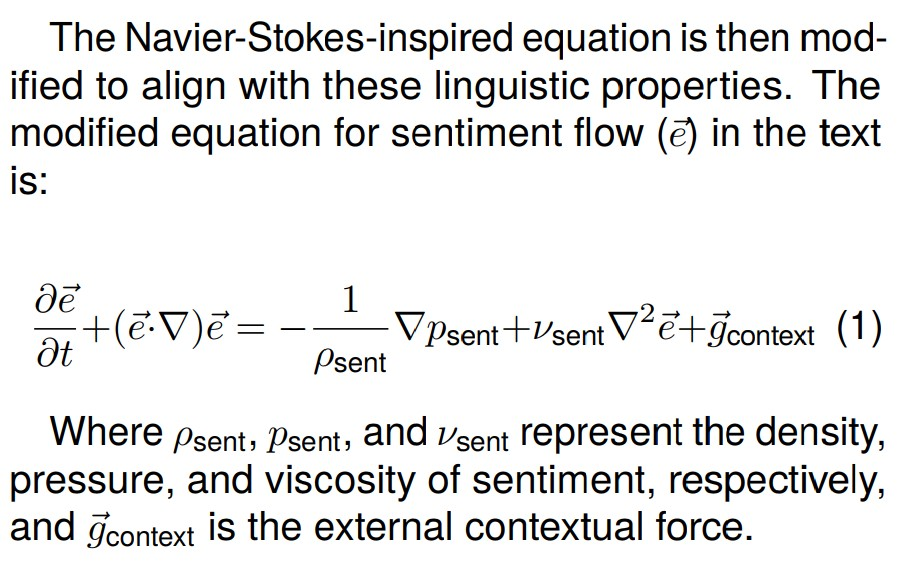

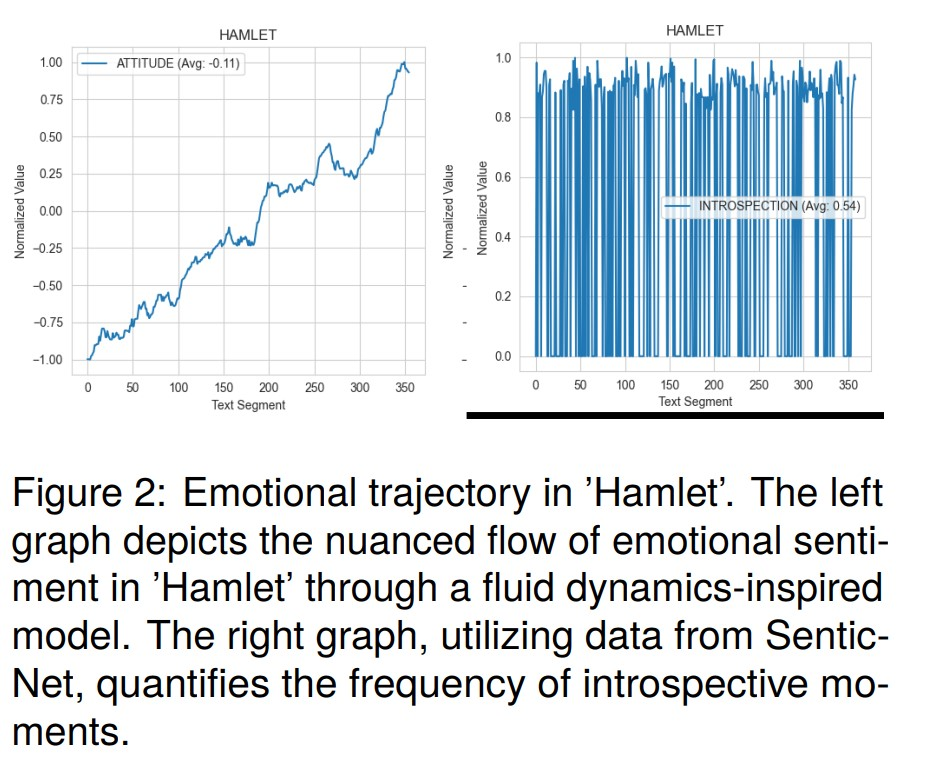

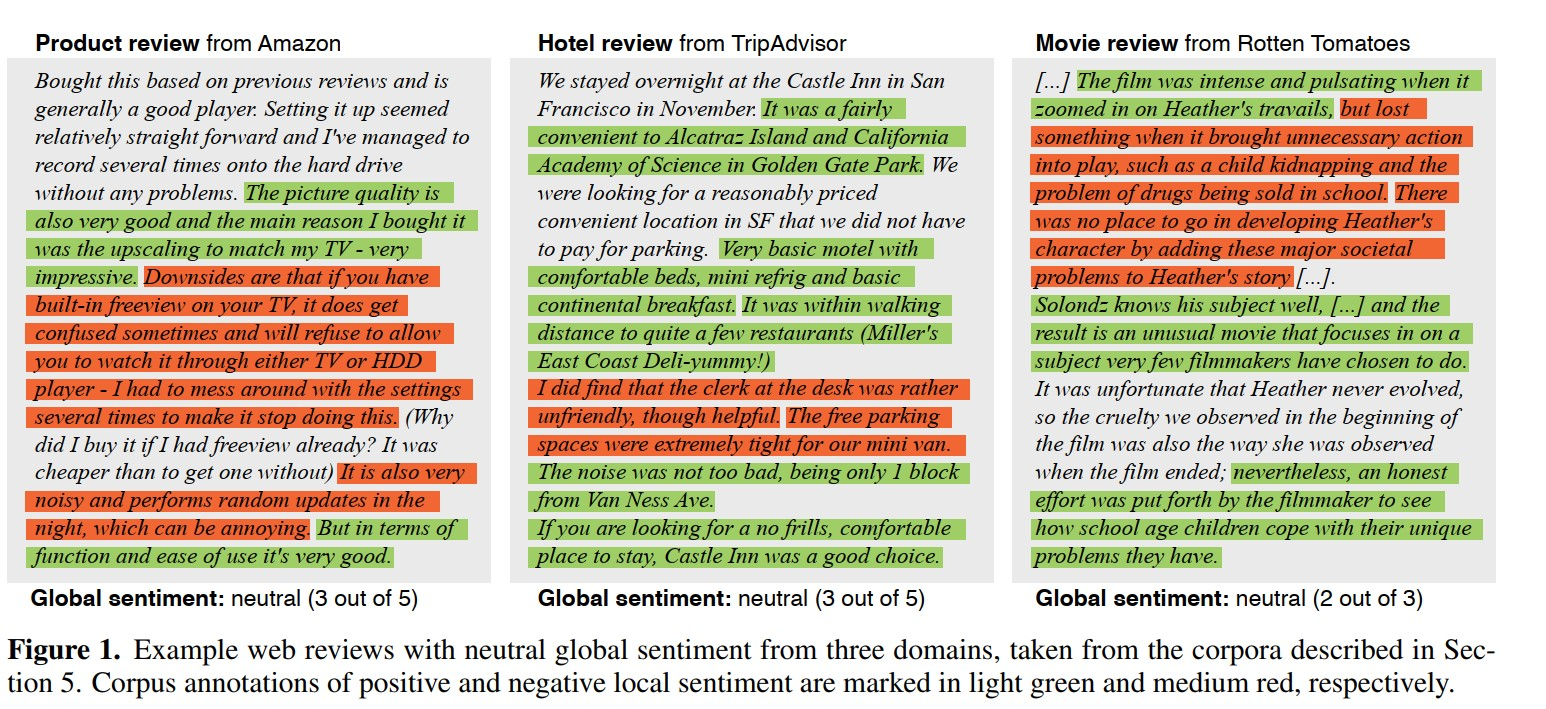